In [47]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Load data

In [19]:
_data_dir = 'all//'

#### Train set

In [23]:
ls all/

item_categories.csv  sales_train_v2.csv     shops.csv
items.csv            sample_submission.csv  test.csv


In [149]:
train = pd.read_csv(_data_dir + 'sales_train_v2.csv')
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train.set_index(pd.DatetimeIndex(train['date']), inplace=True)
del train['date']
train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.00,1.0
2013-01-03,0,25,2552,899.00,1.0
2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


#### Test set

In [150]:
test = pd.read_csv(_data_dir + 'test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


#### Meta data

In [151]:
items = pd.read_csv(_data_dir + 'items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [152]:
categories = pd.read_csv(_data_dir + 'item_categories.csv')
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [153]:
shops = pd.read_csv(_data_dir + 'shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [154]:
items.shape, categories.shape, shops.shape

((22170, 3), (84, 2), (60, 2))

### Exploratory data analysis

#### --> simplifiying - turn data into monthly sales

In [211]:
func = {'date_block_num':['mean'], 'item_price':['mean'], 'item_cnt_day':['sum']}

In [212]:
train_monthly = train.groupby([(train.index.year),(train.index.month), 'shop_id', 'item_id']).agg(func)
train_monthly.index.names = ['year', 'month', 'shop_id', 'item_id']
train_monthly.head()

date_block_num item_cnt_day item_price
                                     mean          sum       mean
year month shop_id item_id                                       
2013 1     0       32                   0          6.0      221.0
                   33                   0          3.0      347.0
                   35                   0          1.0      247.0
                   43                   0          1.0      221.0
                   51                   0          2.0      128.5

In [219]:
train_monthly.columns = [u'date_block_num', u'item_cnt_day', u'item_price']

####  --> is the same items sold in different shops?

In [213]:
def _count_shops(g):
    g['shopes_cnt'] = g['shop_id'].nunique()
    return g.iloc[0]

In [163]:
res = train_monthly.reset_index().groupby('item_id').apply(_count_shops)

In [164]:
res.shape

(21807, 8)

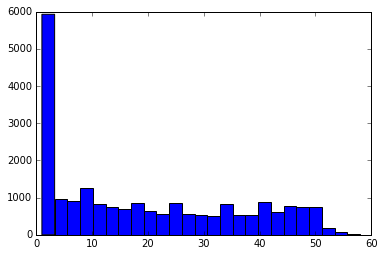

In [165]:
hist(res.shopes_cnt, bins=25);

#### --> sales by shop

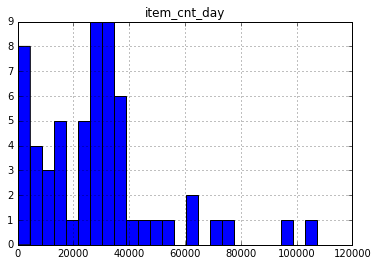

In [173]:
train_monthly.groupby(level='shop_id')[['item_cnt_day']].apply(sum).hist(bins=25);

#### --> sales by time of year

In [220]:
res = train_monthly.groupby(level=['year','month'])[['item_cnt_day']].sum()
res.head()

item_cnt_day
year month              
2013 1          131479.0
     2          128090.0
     3          147142.0
     4          107190.0
     5          106970.0

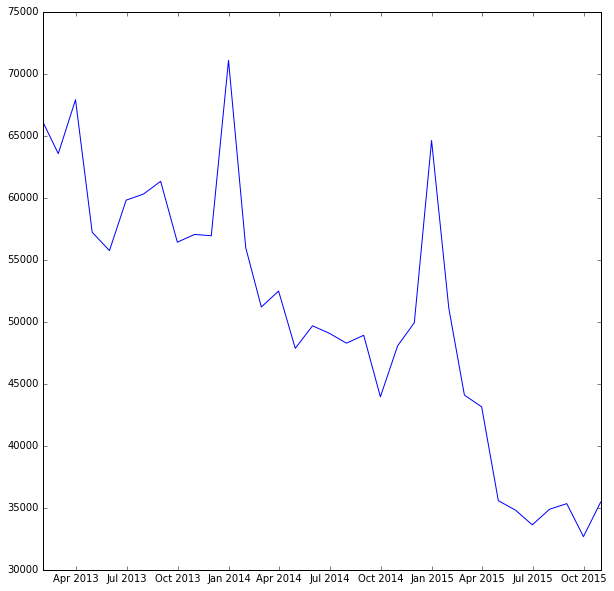

In [206]:
plot(pd.date_range(start='2013-01', end='2015-11', freq='M'), res.item_cnt_day.values);
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

44